## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
## <div align="center"> Semester Genap 2022/2023 </div>
### <div align="center"> WEEK [07] : [Klasifikasi Bayes dan Support Vector] </div>

In [77]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Gempar Bambang Godata"
myNIM = "00000067643"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Gempar Bambang Godata
NIM: 		00000067643
Start: 		2023-03-26 00:18:11.473618
Device ID: 	04eb9038-cb31-11ed-8f8c-e9661b4f9eeb



---

### Dataset yang dipakai:

1. Dataset 1: Tweet Sentiment Extraction WPF - sumber : https://www.kaggle.com/datasets/lishaoshao/tweet-sentiment-extraction-wpf?select=train.csv
2. Dataset 2: Dataset Label Face – sumber : http://vis-www.cs.umass.edu/lfw/

### Hasil kerja

#### 1. Standard imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 

#### 2. .Generate Gaussian Naïve Bayes

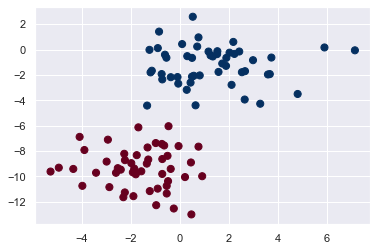

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')

[(-8.0, 8.0), (-15.0, 5.0)]

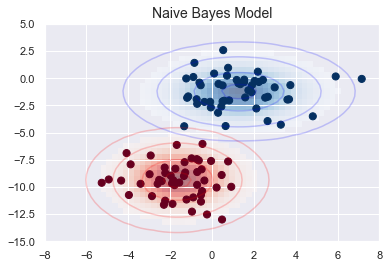

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers = 2, random_state = 2, cluster_std = 1.5)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size = 14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
                levels=[0.01, 0.1, 0.5, 0.9],
                colors=color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim)

#### 3. Implement GaussianNB with Scikit-Learn’s

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

#### 4.Generate some new data and predict the label 

In [5]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

#### 5. Plot this new data to get an idea of where the decision boundary is

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

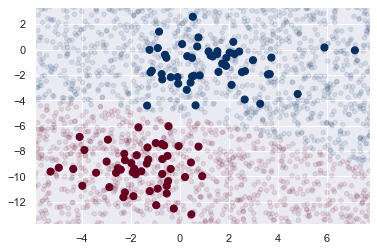

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

#### 6. Bayesian formalism is that it naturally allows for probabilistic classification

In [7]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### MULTINOMIAL NAÏVE BAYES

#### 7. Download the data and take a look the target names

In [8]:
data = pd.read_csv ("twitter.csv")
data.drop(columns=["textID"])

text  \
0                    I`d have responded, if I were going   
1          Sooo SAD I will miss you here in San Diego!!!   
2                              my boss is bullying me...   
3                         what interview! leave me alone   
4       Sons of ****, why couldn`t they put them on t...   
...                                                  ...   
27476   wish we could come see u on Denver  husband l...   
27477   I`ve wondered about rake to.  The client has ...   
27478   Yay good for both of you. Enjoy the break - y...   
27479                         But it was worth it  ****.   
27480     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have responded, if I were going   neutral  
1                                               Sooo SAD  negative  
2                                            bullying me  negative  
3                                         leave me alone  negative  
4                                          Sons of ****,  negative  
...                                                  ...       ...  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          Yay good for both of you.  positive  
27479                         But it was worth it  ****.  positive  
27480  All this flirting going on - The ATG smiles. Y...   neutral  

[27481 rows x 3 columns]

In [9]:
data = data.fillna('')

#### 8. Select just a few of these categories and download the training and testing set

In [10]:
train = data["text"][0:27481]
train_target = data["sentiment"][0:27481]
test = ["both", 'about', 'see', 'break', 'come']
test_target = ["neutral", 'positive', 'negative', 'negative', 'positive']

#### 9. The representative entry from the data (5 first data)

In [11]:
print(train[9])

 Journey!? Wow... u just became cooler.  hehe... (is that possible!?)


#### 10. Use the TF-IDF vectorizer and create a pipeline that attaches it to a multinomial Naïve Bayes Classifier 

In [12]:
from pyrsistent import v
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#### 11. apply the model to the training data and predict labels for the test data

In [13]:
model.fit(train, train_target)
labels = model.predict(test)

#### 12. Evaluate them to learn about the performance of the estimator

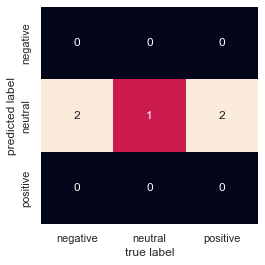

In [14]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=np.unique(train_target), yticklabels=np.unique(train_target))
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 13. Predict for a single string 

In [15]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return pred[0]

In [16]:
predict_category('Enjoy')

'positive'

In [17]:
predict_category('what')

'neutral'

In [18]:
predict_category('going')

'neutral'

### SUPPORT VECTOR MACHINE (SVM) 

#### 14. Standard import

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

#### 15.  The two classes are well separated

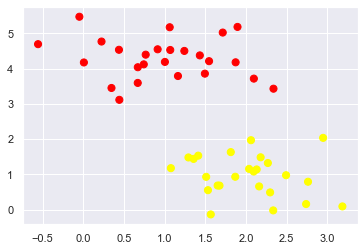

In [20]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

#### 16. Draw them as follows

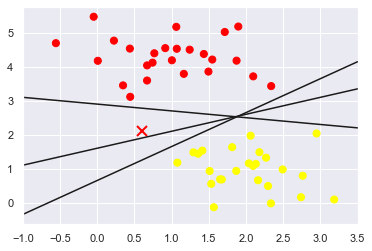

In [21]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m,b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

#### 17. draw around each line a margin of some width, up to the nearest point

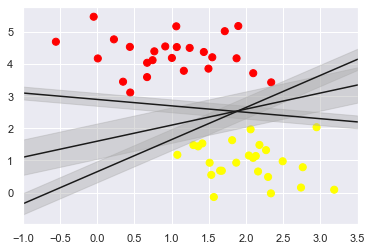

In [22]:
xfit = np.linspace(-1, 3.5)
plt. scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

#### 18. use a linear kernel and set the C parameter to a very large number

In [23]:
from sklearn.svm import SVC
model = SVC (kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

#### 19. Create a quick convenience function that will plot SVM decision boundaries

In [24]:
def plot_svc_decision_function(model, ax = None, plot_support = True):
    if ax is None:
      ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

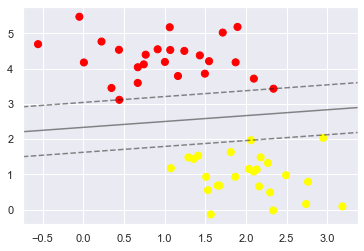

In [25]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

#### 20. The identity of these points are stored in the support_vectors_ attribute of the classifier

In [26]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

#### 21. plot the model learned from the first 60 points and first 120 points of this dataset

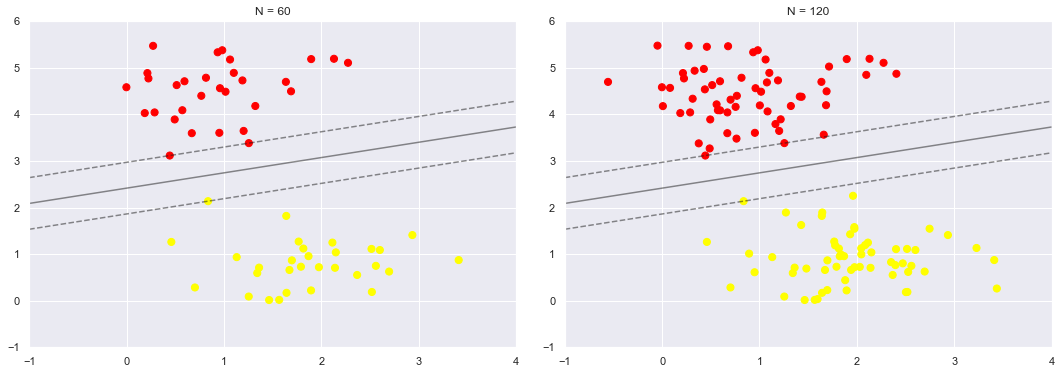

In [27]:
def plot_svm(N=10, ax=None) :
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

#### 22. Use IPython's interactive widgets to view thisfeature of the SVM model interactively

In [30]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

#### 23. The need for kernels, let's look at some data that is not linearly separable

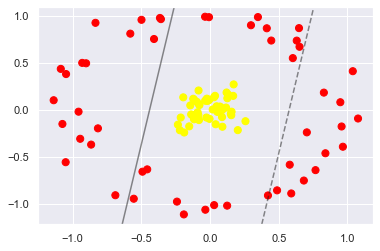

In [31]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

#### 24. One simple projection we could use would be to compute a radial basis function centered on the middle clump

In [32]:
r = np.exp(-(X ** 2).sum(1))

#### 25. Visualize this extra data dimension using a three-dimensional plot

In [33]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y) :
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact (plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

#### 26. Apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel,

In [34]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

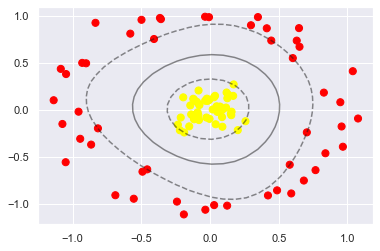

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

#### 27. What if your data has some amount of overlap?

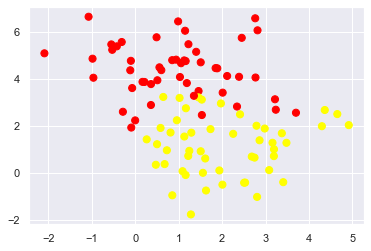

In [36]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

#### 28. Plot shown below gives a visual picture of how a changing C parameter affects the final fit

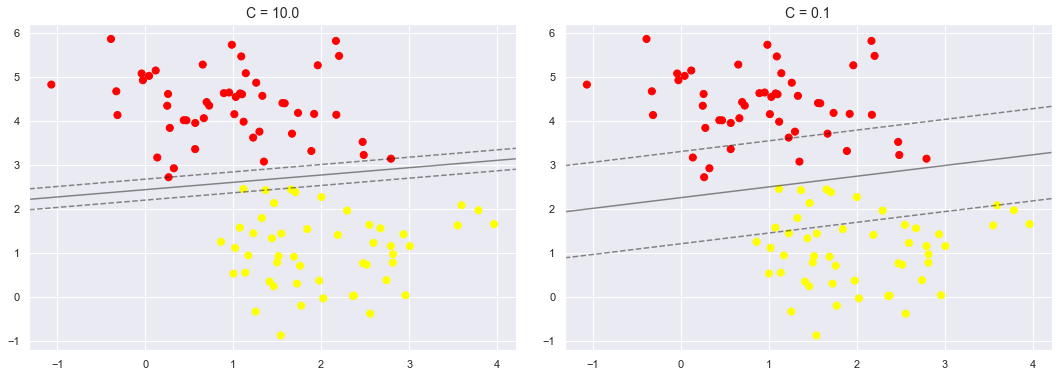

In [37]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]) :
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], 
                model.support_vectors_[:, 1], 
                s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

#### 29. A fetcher for the dataset is built into Scikit-Learn

In [79]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 62, 47)


#### 30. Plot a few of these faces to see what we're working

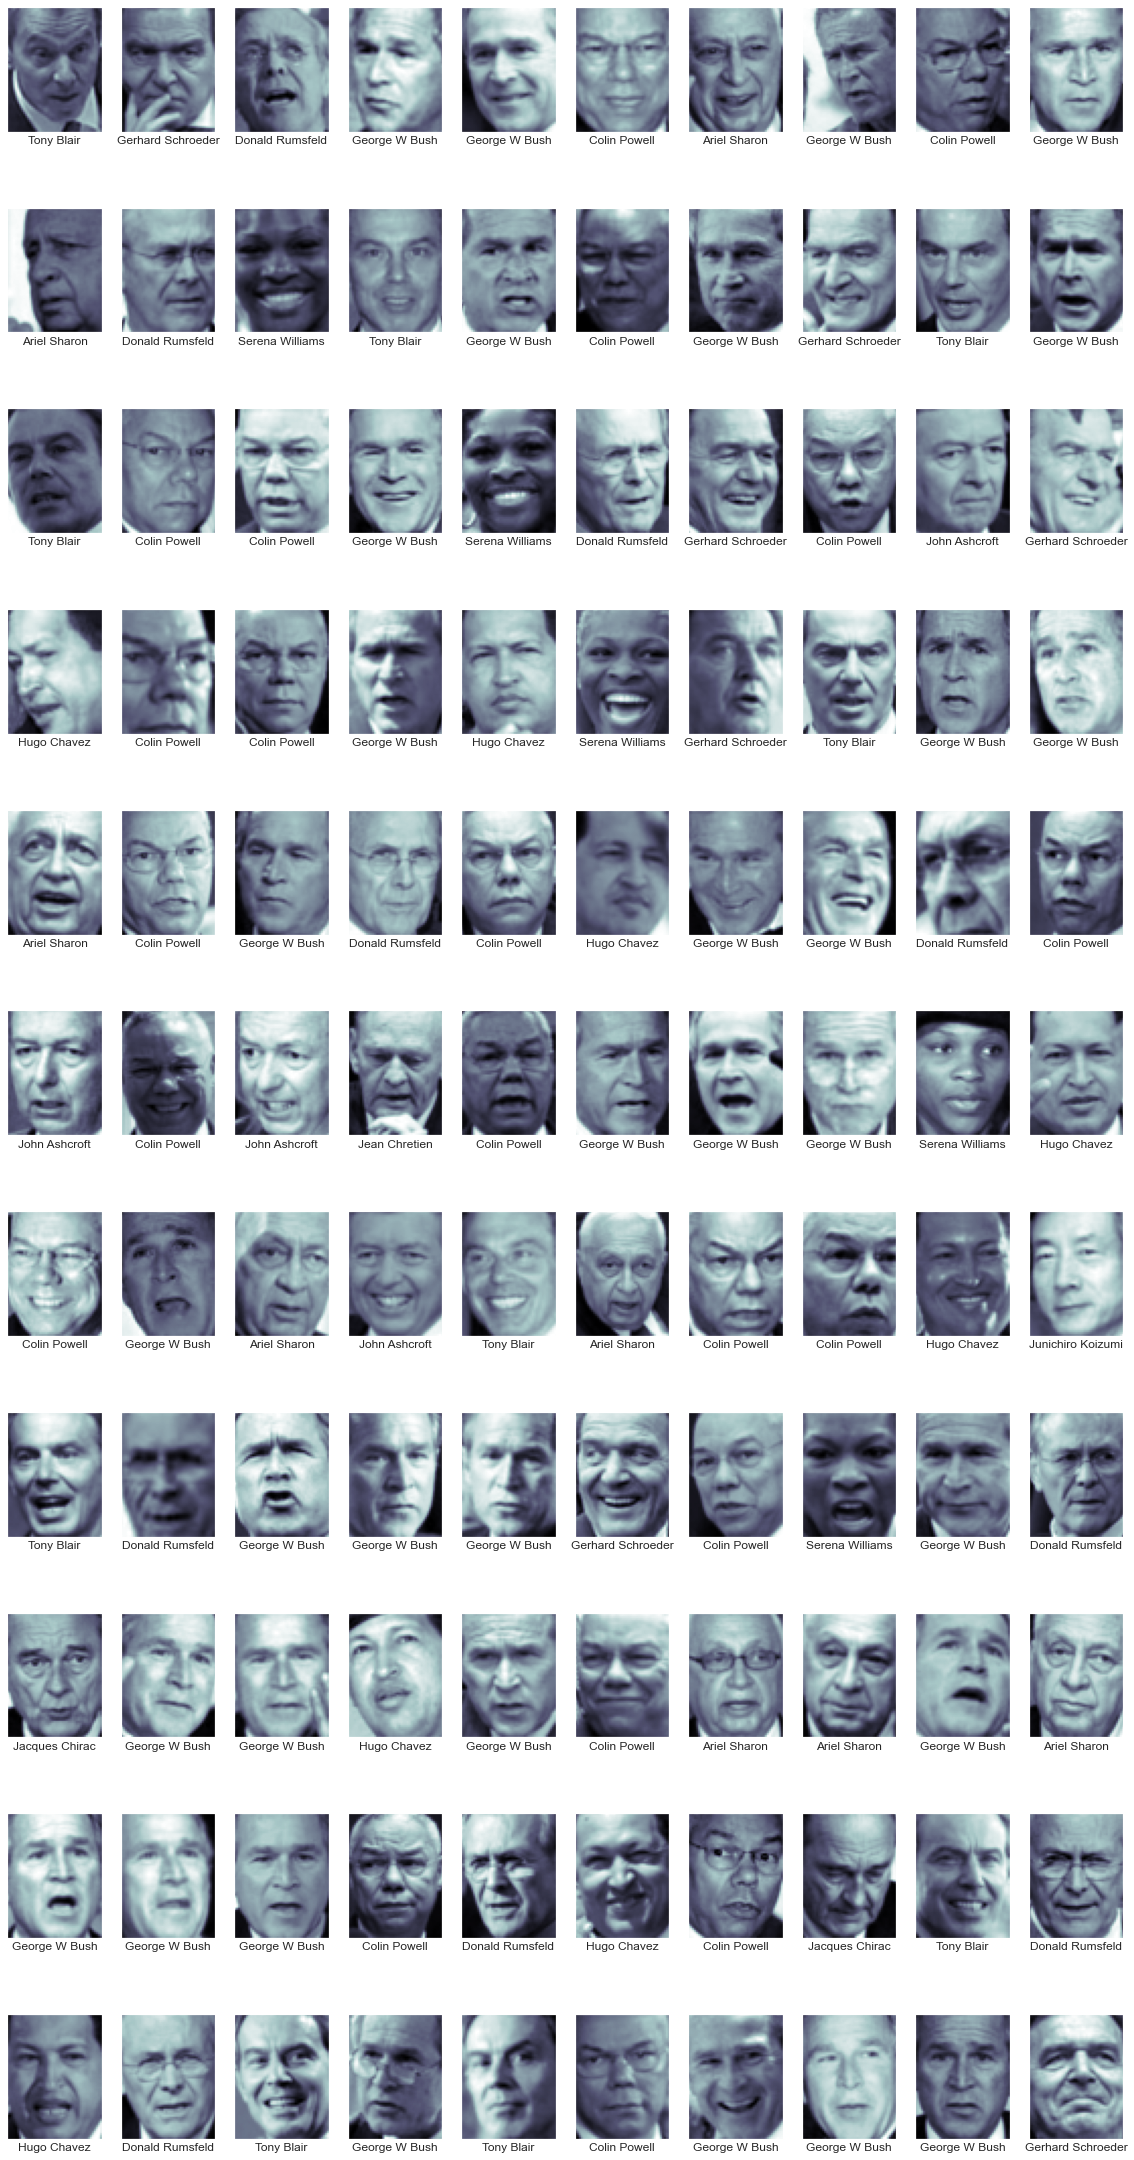

In [80]:
fig, ax = plt.subplots(11,10, figsize=(20, 40))
for i, axi in enumerate(ax.flat) :
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

#### 31. Do the most straightforwardly by packaging the preprocessor and the classifier into a single pipeline

In [81]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

#### 32. Split the data into a training and testing set

In [82]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

#### 33. Use a grid search cross-validation to explore combinations of parameters

In [83]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C' : [1, 5, 10, 50], 'svc__gamma' : [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 56.4 s
Wall time: 21.5 s
{'svc__C': 5, 'svc__gamma': 0.001}


#### 34. Predict the labels for the test data, which the model has not yet seen

In [84]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

#### 35.  Test images along with their predicted values

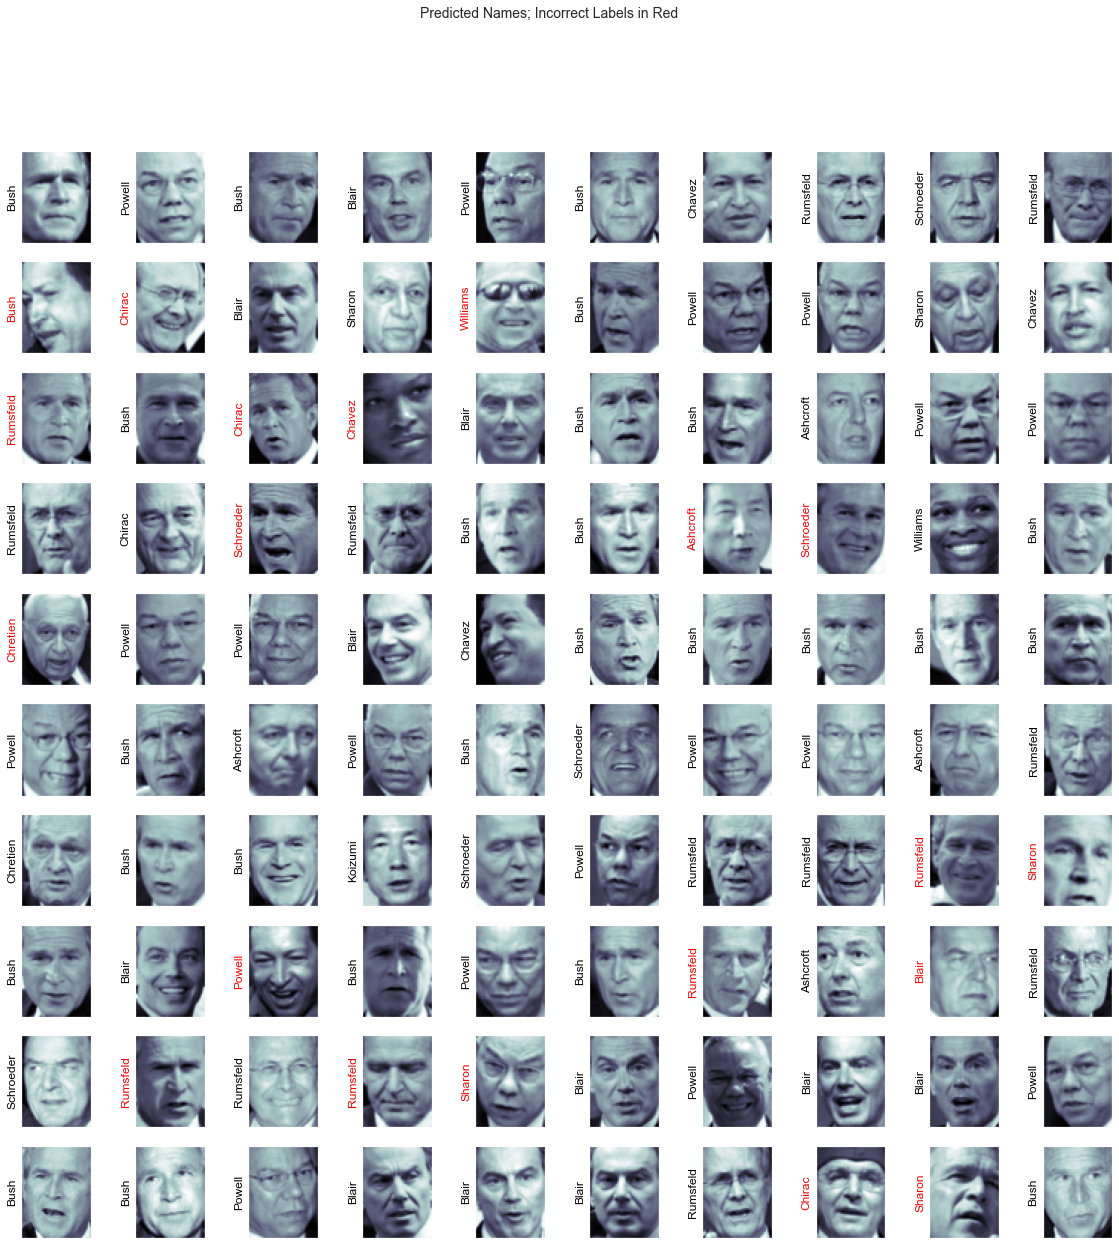

In [85]:
fig, ax = plt. subplots(10,10, figsize=(20, 20))
for i, axi in enumerate(ax.flat) :
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

#### 36. Using the classification report, which lists recovery statistics label by label

In [86]:
from sklearn.metrics import classification_report
print (classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.75      0.73        16
     Colin Powell       0.85      0.92      0.88        66
  Donald Rumsfeld       0.58      0.81      0.68        27
    George W Bush       0.95      0.81      0.87       140
Gerhard Schroeder       0.73      0.79      0.76        24
      Hugo Chavez       0.93      0.76      0.84        17
   Jacques Chirac       0.58      0.70      0.64        10
    Jean Chretien       0.73      0.79      0.76        14
    John Ashcroft       0.82      0.88      0.85        16
Junichiro Koizumi       0.89      0.73      0.80        11
  Serena Williams       0.70      0.78      0.74         9
       Tony Blair       0.83      0.85      0.84        40

         accuracy                           0.82       390
        macro avg       0.77      0.80      0.78       390
     weighted avg       0.84      0.82      0.83       390



#### 37. Display the confusion matrix between these classes

Text(89.18, 0.5, 'predicted label')

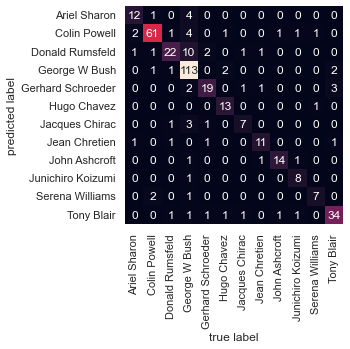

In [87]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')

### Kesimpulan

Pada pemdrograman ini menggunakan dua dataset yang berbeda berupa dataset instagram dan face detection. Dari kedua dataset tersebut dilakukan proses generate untuk mengklasifikasikan probabilitas, linear, dan radial data dengan metode dan syntax yang diikuti sesuai dengan modul week 7. 

- Dataset 1 memiliki confusion matrix yang lebih luas tergantung data atau atribut yang digunakan. Sehingga hasil yang didapat adalah confusion matrix yang juga memprediksi data untuk test data dimana true labels dan predicted labels memiliki nilai kisaran 300 dengan arah diagonal.

- Dataset 2 memiliki hasil pengenalan wajah yang dominan adalah George W Bush walaupun memiliki niali min_faces_per_person=50. Selain itu terdapat pengenalan wajah lain yang dominan seperti Hugo Chavez, Junichiro Koizumi dan Collin Powell berdasarkan hasil confusion matrix

***

### Save the notebook, then convert the notebook to html (by running the next code).

In [78]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Gempar Bambang Godata
NIM: 		00000067643
Time-stamp:	2023-03-26 00:18:16.192892


In [47]:
!jupyter nbconvert --to html "./IF540L_Kelas_A_laporan_M07_67643_Gempar Bambang Godata.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_Kelas_A_laporan_M07_67643_Gempar Bambang Godata.ipynb to html
[NbConvertApp] Writing 1467715 bytes to IF540L_Kelas_A_laporan_M07_67643_Gempar Bambang Godata.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#